## whatsapp Analysis

In [14]:
import regex
import pandas as pd
import numpy as np
import emoji
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


## Python Functions to Prepare Data

In [6]:
def date_time(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -'
    result = regex.match(pattern, s)
    if result:
        return True
    return False
def find_author(s):
    s = s.split(":")
    if len(s)==2:
        return True
    else:
        return False
def getDatapoint(line):
    splitline = line.split(' - ')
    dateTime = splitline[0]
    date, time = dateTime.split(", ")
    message = " ".join(splitline[1:])
    if find_author(message):
        splitmessage = message.split(": ")
        author = splitmessage[0]
        message = " ".join(splitmessage[1:])
    else:
        author= None
    return date, time, author, message

## importing Data

In [16]:
data = []
conversation = 'WhatsApp Chat with NSSF INTERNS.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline()
    messageBuffer = []
    date, time, author = None, None, None
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        if date_time(line):
            if len(messageBuffer) > 0:
                data.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getDatapoint(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)

## Look At The DaTa

In [17]:
df = pd.DataFrame(data, columns=["Date", 'Time', 'Author', 'Message'])
df['Date'] = pd.to_datetime(df['Date'])
print(df.tail(20))
print(df.info())
print(df.Author.unique())

           Date      Time           Author  \
1212 2023-02-21   9:58 AM  +254 729 205284   
1213 2023-02-21  10:01 AM  +254 729 940288   
1214 2023-02-21  10:01 AM  +254 713 562010   
1215 2023-02-21  10:02 AM  +254 725 579820   
1216 2023-02-21  10:05 AM  +254 729 940288   
1217 2023-02-21  10:07 AM  +254 725 579820   
1218 2023-02-21  10:32 AM  +254 748 870920   
1219 2023-02-21  10:34 AM  +254 729 940288   
1220 2023-02-21  11:01 AM  +254 702 238077   
1221 2023-02-21  11:01 AM  +254 702 238077   
1222 2023-02-21  11:08 AM  +254 713 562010   
1223 2023-02-21  11:21 AM  +254 790 831588   
1224 2023-02-21  11:25 AM  +254 795 324469   
1225 2023-02-21  11:29 AM  +254 795 324469   
1226 2023-02-21  11:32 AM  +254 702 238077   
1227 2023-02-21  11:36 AM  +254 729 205284   
1228 2023-02-21  11:37 AM  +254 745 981019   
1229 2023-02-21  11:37 AM  +254 745 981019   
1230 2023-02-21  11:40 AM  +254 729 205284   
1231 2023-02-21  11:40 AM  +254 745 981019   

                                 

## Number of massages in whatsapp chats


In [18]:
total_messages = df.shape[0]
print(total_messages)

1232


In [19]:
media_messages = df[df["Message"]=='<Media omitted>'].shape[0]
print(media_messages)

116


### extract the emojis present in between the chats and have a look at the emojis present in this chat

In [21]:
def split_count(text):
    emoji_list = []
    data = regex.findall(r'\X',text)
    for word in data:
        if any(char in emoji.EMOJI_DATA for char in word):
            emoji_list.append(word)
    return emoji_list
df['emoji'] = df["Message"].apply(split_count)

emojis = sum(df['emoji'].str.len())
print(emojis)

829


## extract the URLs present in this chat and have a look at the final insights

In [23]:
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: regex.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)
print("Chats between +254 729 205284 and +254 729 940288")
print("Total Messages: ", total_messages)
print("Number of Media Shared: ", media_messages)
print("Number of Emojis Shared", emojis)
print("Number of Links Shared", links)

Chats between +254 729 205284 and +254 729 940288
Total Messages:  1232
Number of Media Shared:  116
Number of Emojis Shared 829
Number of Links Shared 26


## Now let’s prepare this data to get more insights to analyze all the messages sent in this chat in more detail:

In [26]:
media_messages_df = df[df['Message'] == '<Media omitted>']
messages_df = df.drop(media_messages_df.index)
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1

l = ["+254 729 205284", "+254 729 940288"]
for i in range(len(l)):
  # Filtering out messages of particular user
  req_df= messages_df[messages_df["Author"] == l[i]]
  # req_df will contain messages of only one particular user
  print(f'Stats of {l[i]} -')
  # shape will print number of rows which indirectly means the number of messages
  print('Messages Sent', req_df.shape[0])
  #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
  print('Average Words per message', words_per_message)
  #media conists of media messages
  media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0]
  print('Media Messages Sent', media)
  # emojis conists of total emojis
  emojis = sum(req_df['emoji'].str.len())
  print('Emojis Sent', emojis)
  #links consist of total links
  links = sum(req_df["urlcount"])   
  print('Links Sent', links)


Stats of +254 729 205284 -
Messages Sent 66
Average Words per message 5.681818181818182
Media Messages Sent 2
Emojis Sent 83
Links Sent 0
Stats of +254 729 940288 -
Messages Sent 86
Average Words per message 9.255813953488373
Media Messages Sent 6
Emojis Sent 79
Links Sent 1


## Now let’s prepare a visualization of the total emojis present in the chat and the type of emojis sent between the two people. It will help in understanding the relationship between both the people:

In [27]:
total_emojis_list = list(set([a for b in messages_df.emoji for a in b]))
total_emojis = len(total_emojis_list)

total_emojis_list = list([a for b in messages_df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
for i in emoji_dict:
  print(i)
  
emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
import plotly.express as px
fig = px.pie(emoji_df, values='count', names='emoji')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

('😂', 377)
('🤣', 100)
('😅', 86)
('😀', 76)
('😃', 36)
('😝', 12)
('😍', 9)
('🤔', 8)
('😁', 8)
('😊', 6)
('😒', 6)
('💯', 6)
('😹', 6)
('😭', 6)
('💔', 5)
('😎', 5)
('👇', 5)
('🌚', 4)
('🙄', 4)
('😔', 4)
('🤭', 3)
('😄', 3)
('🙆\u200d♂️', 3)
('👍', 3)
('🥲', 3)
('😳', 3)
('🥴', 2)
('🧐', 2)
('🔥', 2)
('👊🏾', 2)
('👀', 2)
('🤷🏼\u200d♂️', 2)
('🤪', 2)
('\U0001fae3', 2)
('💥', 2)
('🚼', 2)
('💖', 1)
('🥂', 1)
('🤝', 1)
('🙈', 1)
('🥳', 1)
('🎊', 1)
('🥰', 1)
('🚮', 1)
('😏', 1)
('🌝', 1)
('🤓', 1)
('👆🏾', 1)
('🤷🏿\u200d♀️', 1)
('🕸️', 1)
('🙏', 1)
('🤦🏾\u200d♂️', 1)
('😋', 1)
('😥', 1)
('💀', 1)
('😢', 1)
('\U0001fae1', 1)
('💪🏽', 1)


## Now let’s have a look at the most used words in this WhatsApp chat by visualizing a word cloud:

There are 46260 words in all the messages.


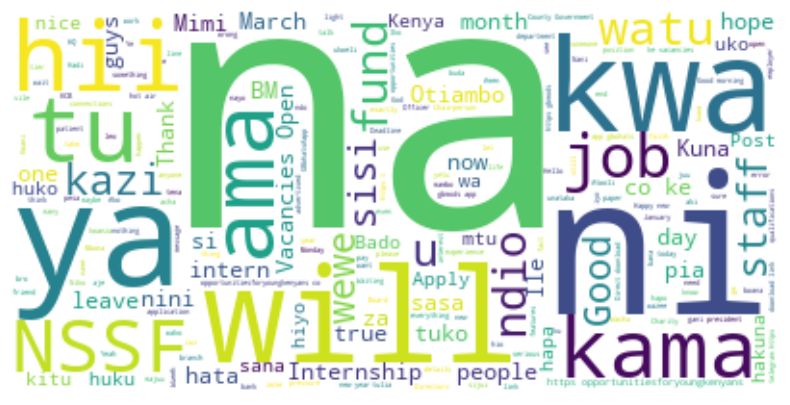

In [28]:
text = " ".join(review for review in messages_df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Now let’s have a look at the most used words by each person by visualizing two different word clouds:

Author name +254 729 205284


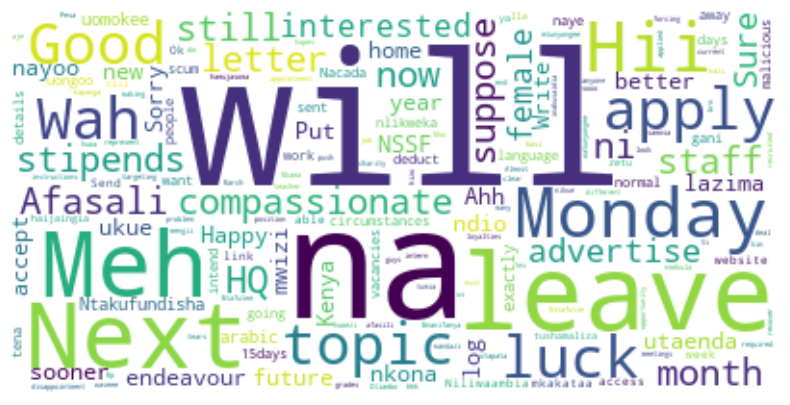

Author name +254 729 940288


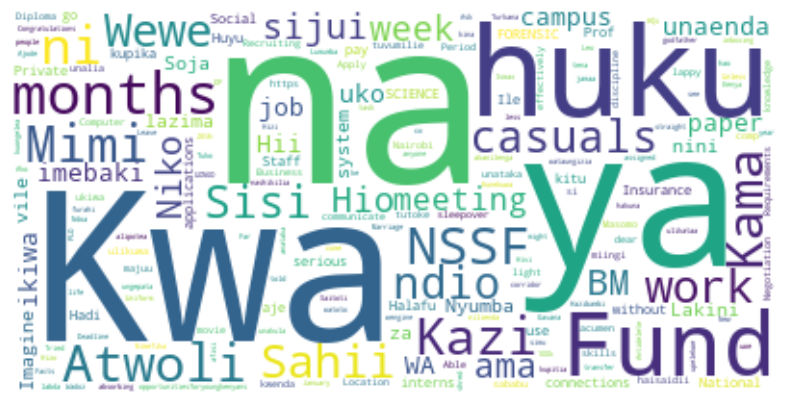

In [29]:
l = ["+254 729 205284", "+254 729 940288"]
for i in range(len(l)):
  dummy_df = messages_df[messages_df['Author'] == l[i]]
  text = " ".join(review for review in dummy_df.Message)
  stopwords = set(STOPWORDS)
  #Generate a word cloud image
  print('Author name',l[i])
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  #Display the generated image   
  plt.figure( figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()